In [1]:
def ESG_labeling(x):
    
    if x == 0:
        x = 'A+'
    
    elif x ==  1:
        x = 'A'
        
    elif x == 2:
        x = 'B+'
    
    elif x == 3:
        x = 'B'
        
    elif x == 4:
        x = 'C'
        
    elif x == 5:
        x = 'D'
        
    return x
    

In [2]:
#사회 부문 예측
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

news_data = pd.read_csv('topic_variable.csv')

#유의적인 변수만을 변수로 선택함

#news_variable = news_data[['company','Topic_2','Topic_7','Topic_3']] 

#전체 변수 선택 시
news_variable = news_data.drop(['date','합계'],axis = 1)

news_variable

,Unnamed: 0,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,company
0,0,0.039983,0.280724,0.103535,0.048822,0.042298,0.126684,0.236742,0.121212,BGF리테일
1,1,0.236842,0.067251,0.210526,0.315789,0.000000,0.102339,0.035088,0.032164,BNK금융지주
2,2,0.000000,0.000000,0.625000,0.000000,0.000000,0.250000,0.125000,0.000000,BYC
3,3,0.125000,0.239583,0.218750,0.177083,0.000000,0.114583,0.062500,0.062500,CJ CGV
4,4,0.100976,0.111486,0.071321,0.239865,0.300113,0.067755,0.019332,0.089152,CJ대한통운
...,...,...,...,...,...,...,...,...,...,...
255,255,0.444444,0.203704,0.000000,0.166667,0.000000,0.148148,0.037037,0.000000,효성화학
256,256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,휠라홀딩스
257,257,0.058824,0.147059,0.117647,0.176471,0.058824,0.382353,0.000000,0.058824,휴비스
258,258,0.000000,0.500000,0.000000,0.166667,0.000000,0.000000,0.333333,0.000000,휴켐스


In [3]:
job_data = pd.read_csv('job_all_data.csv',encoding = 'cp949')

job_variable = job_data.iloc[0:,1:7]

job_variable = pd.concat([job_data['회사명'],job_variable],axis=1)

job_variable.columns = ['company', 'star', 'up', 'wel', 'wl','cul','management']

job_variable

,company,star,up,wel,wl,cul,management
0,BGF리테일,3.0,3.0,2.8,2.7,2.8,2.5
1,BYC,2.3,1.8,3.3,2.3,1.9,1.8
2,CJ CGV,3.5,3.6,3.0,3.3,3.1,2.9
3,CJ대한통운,2.8,2.9,2.2,2.6,2.9,2.4
4,CJ씨푸드,3.1,3.3,2.7,2.9,2.8,2.6
...,...,...,...,...,...,...,...
244,휴켐스,2.8,3.8,2.7,2.5,2.8,2.4
245,흥국화재,2.6,2.3,2.8,2.5,2.5,2.2
246,한전기술,3.9,3.9,4.3,4.0,3.7,3.0
247,현대중공업지주,2.9,2.9,3.1,2.6,2.9,2.2


In [4]:
fi_variable = pd.read_csv('fi_all_data.csv',encoding = 'cp949')
fi_variable

,company,fi
0,BGF리테일,2.308304
1,BYC,0.664337
2,CJ CGV,2.477649
3,CJ대한통운,7.220688
4,CJ씨푸드,0.135332
...,...,...
244,현대에너지솔루션,0.459174
245,휴켐스,0.846391
246,한전기술,0.699244
247,현대중공업지주,7.727859


In [5]:
#ESG 등급

ESG = pd.read_csv('ESG_rating.csv', encoding = 'cp949')

ESG

,company,result
0,AJ네트웍스,B
1,AK홀딩스,B+
2,BGF,A
3,BGF리테일,A
4,BNK금융지주,A+
...,...,...
758,효성첨단소재,A
759,효성티앤씨,A
760,효성화학,A
761,휠라홀딩스,A


In [6]:
df_train = pd.merge(pd.merge(pd.merge(news_variable, job_variable), fi_variable),ESG)

df_train

,Unnamed: 0,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,company,star,up,wel,wl,cul,management,fi,result
0,0,0.039983,0.280724,0.103535,0.048822,0.042298,0.126684,0.236742,0.121212,BGF리테일,3.0,3.0,2.8,2.7,2.8,2.5,2.308304,A
1,2,0.000000,0.000000,0.625000,0.000000,0.000000,0.250000,0.125000,0.000000,BYC,2.3,1.8,3.3,2.3,1.9,1.8,0.664337,B
2,3,0.125000,0.239583,0.218750,0.177083,0.000000,0.114583,0.062500,0.062500,CJ CGV,3.5,3.6,3.0,3.3,3.1,2.9,2.477649,A
3,4,0.100976,0.111486,0.071321,0.239865,0.300113,0.067755,0.019332,0.089152,CJ대한통운,2.8,2.9,2.2,2.6,2.9,2.4,7.220688,A
4,5,0.056026,0.180791,0.165254,0.054614,0.075330,0.078311,0.193817,0.195857,CJ제일제당,2.9,3.0,2.6,3.0,3.0,2.5,9.538798,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,255,0.444444,0.203704,0.000000,0.166667,0.000000,0.148148,0.037037,0.000000,효성화학,2.3,1.9,2.8,2.4,2.5,1.7,1.564620,A
236,256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,휠라홀딩스,2.8,2.8,2.9,2.4,2.9,2.3,0.662624,A
237,257,0.058824,0.147059,0.117647,0.176471,0.058824,0.382353,0.000000,0.058824,휴비스,3.1,3.4,2.9,2.8,3.2,2.5,0.793223,A
238,258,0.000000,0.500000,0.000000,0.166667,0.000000,0.000000,0.333333,0.000000,휴켐스,2.8,3.8,2.7,2.5,2.8,2.4,0.846391,B+


In [7]:
from sklearn.preprocessing import LabelEncoder

#독립변수와 종속변수 분리

x = df_train.drop(['Unnamed: 0','company','result'], axis=1)

print(len(x))

y = df_train['result']

print(len(y))

#ESG등급 라벨링

le = LabelEncoder()

le.fit(y)

labels = le.classes_

y = le.transform(y)

240
240


In [8]:
pd.concat([x,pd.DataFrame(y),df_train['company']],axis=1).to_excel('final.xlsx')

In [9]:
pd.concat([x,pd.DataFrame(y)],axis=1).to_excel('finalv1111.xlsx')

In [10]:
# target(Price)와 가장 correlated 된 features 를 k개 고르기.

## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import SelectKBest, f_classif

x_count = 15

## selctor 정의하기.
selector = SelectKBest(score_func=f_classif, k=x_count)

x_selected = pd.DataFrame(selector.fit_transform(x, y))

## f_regresison, SelectKBest 불러오기.

## selctor 정의하기.
all_names = x.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성(변수)들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['Topic_0', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5',
       'Topic_6', 'Topic_7', 'star', 'up', 'wel', 'wl', 'cul', 'management',
       'fi'],
      dtype='object')
Unselected names:  Index([], dtype='object')


In [11]:
#pd.concat([x,pd.DataFrame(y)],axis=1).to_excel('finalv15.xlsx')
from sklearn.model_selection import train_test_split

# train 데이터 세트와 test 데이터 세트를 구성한다.
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.3, random_state = 42, stratify = y)

In [12]:
#SVM

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import mglearn
import numpy as np
from tqdm import tqdm_notebook

SVM_model = SVC(kernel='rbf')

SVM_model = BaggingClassifier(SVM_model, random_state = 42, n_estimators = 10)

SVM_model.fit(x_train, y_train)

print('정확도 = %.22f ' % SVM_model.score(x_test, y_test))

정확도 = 0.3611111111111111049432 


In [13]:
#랜덤포레스트

from sklearn.ensemble import RandomForestClassifier

# 모델 생성

forest = RandomForestClassifier(n_estimators= 10, random_state = 42)

forest.fit(x_train, y_train)

# 정확도 확인
print('정확도 = %.22f ' % forest.score(x_test, y_test))

정확도 = 0.4861111111111111049432 


In [14]:
#DNN (은닉층 2개)

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout

#1. One-hot incoding, DNN의 경우 층화추출

y_train_DNN = to_categorical(y_train)
y_test_DNN = to_categorical(y_test)

# 2. 모델 구성
model = Sequential()

#은닉층 1
model.add(Dense(256, input_dim = x_count, activation = 'relu'))
model.add(Dropout(0.5))

#은닉층 2
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#은닉층 3
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

#은닉층 4
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

#은닉층 5
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

# 3. 모델 학습과정 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# 4. 모델 학습
DNN_model = model.fit(x_train, y_train_DNN, epochs = 200, batch_size = 2)

# 5. 모델 평가 
score = model.evaluate(x_test, y_test_DNN, batch_size=2)

print('정확도:', score[1])


Epoch 1/200
84/84 [==============================] - 1s 1ms/step - loss: 2.6187 - accuracy: 0.1845
Epoch 2/200
84/84 [==============================] - 0s 1ms/step - loss: 2.2518 - accuracy: 0.2262
Epoch 3/200
84/84 [==============================] - 0s 1ms/step - loss: 1.9136 - accuracy: 0.2440
Epoch 4/200
84/84 [==============================] - 0s 1ms/step - loss: 1.8691 - accuracy: 0.2679
Epoch 5/200
84/84 [==============================] - 0s 864us/step - loss: 1.9284 - accuracy: 0.2500
Epoch 6/200
84/84 [==============================] - 0s 874us/step - loss: 1.8022 - accuracy: 0.2560
Epoch 7/200
84/84 [==============================] - 0s 915us/step - loss: 1.8162 - accuracy: 0.2976
Epoch 8/200
84/84 [==============================] - 0s 861us/step - loss: 1.7927 - accuracy: 0.2500
Epoch 9/200
84/84 [==============================] - 0s 831us/step - loss: 1.6019 - accuracy: 0.3333
Epoch 10/200
84/84 [==============================] - 0s 844us/step - loss: 1.5973 - accuracy: 0.35

84/84 [==============================] - 0s 883us/step - loss: 1.4237 - accuracy: 0.3631
Epoch 82/200
84/84 [==============================] - 0s 877us/step - loss: 1.4122 - accuracy: 0.3571
Epoch 83/200
84/84 [==============================] - 0s 835us/step - loss: 1.4032 - accuracy: 0.3631
Epoch 84/200
84/84 [==============================] - 0s 817us/step - loss: 1.4627 - accuracy: 0.3631
Epoch 85/200
84/84 [==============================] - 0s 784us/step - loss: 1.4194 - accuracy: 0.3571
Epoch 86/200
84/84 [==============================] - 0s 916us/step - loss: 1.4336 - accuracy: 0.3571
Epoch 87/200
84/84 [==============================] - 0s 813us/step - loss: 1.3922 - accuracy: 0.3690
Epoch 88/200
84/84 [==============================] - 0s 888us/step - loss: 1.4358 - accuracy: 0.3571
Epoch 89/200
84/84 [==============================] - 0s 814us/step - loss: 1.4128 - accuracy: 0.3631
Epoch 90/200
84/84 [==============================] - 0s 799us/step - loss: 1.4558 - accuracy: 

84/84 [==============================] - 0s 858us/step - loss: 1.3697 - accuracy: 0.3571
Epoch 161/200
84/84 [==============================] - 0s 806us/step - loss: 1.4133 - accuracy: 0.3631
Epoch 162/200
84/84 [==============================] - 0s 839us/step - loss: 1.4002 - accuracy: 0.3631
Epoch 163/200
84/84 [==============================] - 0s 824us/step - loss: 1.3535 - accuracy: 0.3631
Epoch 164/200
84/84 [==============================] - 0s 813us/step - loss: 1.4165 - accuracy: 0.3631
Epoch 165/200
84/84 [==============================] - 0s 856us/step - loss: 1.3982 - accuracy: 0.3631
Epoch 166/200
84/84 [==============================] - 0s 814us/step - loss: 1.3532 - accuracy: 0.3631
Epoch 167/200
84/84 [==============================] - 0s 829us/step - loss: 1.3627 - accuracy: 0.3631
Epoch 168/200
84/84 [==============================] - 0s 797us/step - loss: 1.3433 - accuracy: 0.3631
Epoch 169/200
84/84 [==============================] - 0s 789us/step - loss: 1.3621 - a

In [15]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
215,0.091398,0.408602,0.037634,0.111111,0.010753,0.197133,0.059140,0.084229,3.1,3.6,3.1,2.9,2.8,2.5,9.140432
42,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.8,3.3,2.6,2.3,2.6,2.1,0.598657
128,0.498952,0.009434,0.106918,0.032495,0.000000,0.294549,0.014675,0.042977,3.0,2.8,2.8,2.9,2.9,2.5,0.431493
106,0.456522,0.086957,0.326087,0.000000,0.000000,0.108696,0.000000,0.021739,2.8,3.2,2.7,2.6,2.5,2.4,0.564505
27,0.063877,0.054236,0.068354,0.022211,0.259125,0.375861,0.027720,0.128616,3.5,4.0,3.4,2.7,2.8,2.6,3.635974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.923077,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,3.0,2.1,3.5,3.4,2.9,2.6,0.498943
82,0.125000,0.296875,0.140625,0.156250,0.015625,0.203125,0.062500,0.000000,2.8,3.1,2.8,2.6,2.6,2.5,25.280545
8,0.015083,0.182057,0.111801,0.123945,0.045061,0.012785,0.098124,0.411144,2.8,3.1,3.1,2.6,2.6,2.2,2.108791
11,0.555556,0.022222,0.133333,0.066667,0.000000,0.155556,0.066667,0.000000,2.7,2.9,2.6,2.3,2.7,2.2,0.536924


In [16]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig(algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

In [17]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*1 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = RandomForestClassifier(n_estimators = v_n_estimators, random_state=42,n_jobs = -1)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [18]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        model = RandomForestClassifier(max_depth = v_max_depth, n_estimators = n_estimator,random_state=42,n_jobs = -1)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

In [19]:
algorithm = 'RFC'
algorithm_name = 'rfc'

    n_estimators  TrainScore  TestScore
0              1      0.7976     0.2778
1              2      0.7619     0.3750
2              3      0.9048     0.3333
3              4      0.9167     0.4028
4              5      0.9286     0.3611
..           ...         ...        ...
94            95      1.0000     0.5694
95            96      1.0000     0.5556
96            97      1.0000     0.5833
97            98      1.0000     0.5556
98            99      1.0000     0.5556

[99 rows x 3 columns]


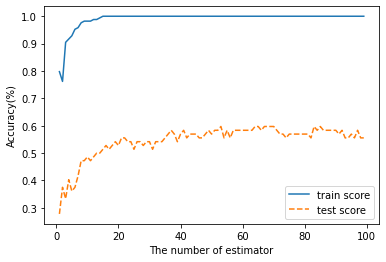

In [20]:
n_estimator_min = 1
n_estimator_max = 100
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [21]:
n_estimator = 37

    depth  TrainScore  TestScore
0       1      0.4405     0.3889
1       2      0.5357     0.4306
2       3      0.6667     0.5139
3       4      0.7202     0.4444
4       5      0.8690     0.4722
..    ...         ...        ...
94     95      1.0000     0.5833
95     96      1.0000     0.5833
96     97      1.0000     0.5833
97     98      1.0000     0.5833
98     99      1.0000     0.5833

[99 rows x 3 columns]


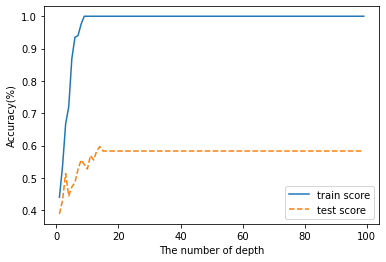

In [22]:
depth_min = 1
depth_max = 100
optimi_maxdepth(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

In [23]:
n_depth = 14

In [24]:
#랜덤포레스트

from sklearn.ensemble import RandomForestClassifier

# 모델 생성

forest = RandomForestClassifier(n_estimators= n_estimator, max_depth = n_depth, random_state = 42,n_jobs = -1)

forest.fit(x_train, y_train)

# 정확도 확인
print('정확도 = %.22f ' % forest.score(x_test, y_test))

정확도 = 0.5972222222222222098864 


In [25]:
import joblib

joblib.dump(forest, 'ESG_Predict_model.pkl')

['ESG_Predict_model.pkl']